# [해설지] 프로젝트 (1) : 포켓몬 데이터 분석하기 
## 포켓몬 데이터 뭉치에서 전설 포켓몬을 골라낼 수 있을까?

데이터 분석 프로젝트를 통한 탐색적 데이터 분석(EDA) 연습하기

### 학습 목표
- 속성, 스탯 등 여러가지 데이터가 있는 포켓몬 데이터셋을 활용해서 `전설 포켓몬`의 특징을 파악합니다.
- 데이터 분포를 확인하고, 변수간 관계를 파악하는 EDA를 통해 데이터 전체를 명확히 이해합니다.
- EDA를 진행하는 과정에서 다양한 파이썬 함수 사용, 시각화 방법, 그래프 해석 방법을 학습합니다. 

---

# Contents
**1. [데이터 분석 준비하기](#1.-데이터-분석-준비하기)**   

**2. [EDA #1: 전설 포켓몬 데이터 셋 분리하기](#2.EDA-#1:-전설-포켓몬-데이터-셋-분리하기)**   


**3. [EDA #2: 모든 컬럼 뜯어보기](#3.-EDA-#2:-모든-컬럼-뜯어보기)**

---

## 1. 데이터 분석 준비하기

본격적으로 데이터 분석 프로젝트를 시작하기에 앞서, 먼저 앞으로의 데이터 분석에 필요한 module을 import 해 봅니다.    
1장에서 사용했던 데이터 분석을 위한 파이썬 라이브러리인 `numpy`, `pandas`, `matplotlib`, `seaborn` 을 사용해 보겠습니다.

In [1]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Mounted at /content/drive


In [2]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_3_pokemon_project' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_3_pokemon_project


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/elice_hana_DT/track_3_data_analysis/Chapter_3_pokemon_project


### 1-1. Import Modules

In [4]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

# matplotlib의 pyplot
import matplotlib.pyplot as plt

# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

### 1-2. Load Dataset

모듈 임포트를 완료하였다면, 이제 이번 프로젝트에서 사용할 포켓몬 데이터셋을 가져와 보겠습니다. 

많은 팬덤과 오래된 게임 출시 연도만큼 포켓몬과 관련된 정보를 담은 다양한 데이터 셋이 존재합니다. 그 중에서도 저희는 Kaggle(캐글) 홈페이지에 저장되어있는 데이터 셋을 활용해볼 것입니다.


데이터 출처 : [Kaggle(캐글)](https://www.kaggle.com/abcsds/pokemon) 

캐글은 예측모델 및 분석 대회를 위한 플랫폼으로 기업 및 단체에서 데이터와 해결 과제를 등록하면,자유롭게 이를 해결하는 모델을 개발하고 경쟁할 수 있습니다.
특히 데이터 분석 분야에서는 가장 유명하고, 인정받는 플랫폼으로 데이터 분석을 위한 다양한 데이터 셋도 함께 제공하고 있습니다.

엘리스에서는 이번 프로젝트에서 사용할 포켓몬 데이터 셋을 이미 실습 파일 목록에 함께 업로드하였기 때문에    
별개로 저장 및 업로드를 하시지 않아도 실습 진행이 가능합니다. 

**참고 - Dataset Description 살펴보기**

데이터 셋을 자세히 알아보기 위해서는 데이터를 세세하게 뜯어보는 과정을 거쳐야 합니다.

그러나 그 전에 먼저 어떤 정보가 담겨져 있는 지에 대한 포괄적 설명은 대개 해당 데이터 셋을 얻을 수 있는 웹페이지에서도 확인이 가능합니다.

데이터 셋이 전체적으로 어떤 정보를 담고 있는지, 그리고 어떤 출처를 가지고 있는지를 Dataset Description을 통해 먼저 알아보도록 하겠습니다

```
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

이 데이터 셋에는 번호, 이름, 첫 번째 및 두 번째 유형 및 HP, 공격력, 방어력, 특수 공격, 특수 방어 및 속도와 같은 기본 통계를 포함한 721 개의 포켓몬이 포함되어 있습니다. 이 데이터 셋은 아이들에게 통계를 가르칠 때 매우 유용하며, 특정 유형의 경우 기계 학습(머신 러닝)에 대한 소개를 제공할 수 있습니다.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

게임 내에서 공격이 얼마나 많은 피해를 줄지 계산하는 데 사용되는 기본 속성입니다. 이 데이터 셋은 포켓몬 게임에 관한 것입니다 (포켓몬 카드 또는 포켓몬 고에 관한 데이터는 아닙니다.)

The data for this table has been acquired from several different sites, including:

pokemon.com
pokemondb
bulbapedia

이 테이블의 데이터는 다음을 포함하여 여러 다른 사이트에서 얻었습니다.

One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.

이 데이터베이스에 대한 질문과 그에 대한 답은 다음과 같습니다 : 포켓몬의 유형은 공격과 방어만으로 유추 할 수 없습니다. 포켓몬의 유형을 정의 할 수있는 두 변수를 찾는 것이 좋습니다. 2D 공간에 2 개의 변수를 시각화 할 수 있으며 이는 기계 학습(머신 러닝)의 예시로 사용됩니다. 이것은 머신 러닝 수업에서 좋아할만한 시각적 인 예를 만들어내는 것을 의미 할 수 있습니다.
```


위 데이터에 대한 Description을 통해 데이터셋에 담겨있는 정보들은 어떤 것들인지에 대해 알아보았습니다.
이제 직접 실제 데이터 셋을 불러오고, 분석해보며 데이터에 대해 이해해보도록 하겠습니다.

본격적으로 파이썬 라이브러리인 `pandas`를 활용해 데이터를 가져와봅니다.

In [5]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
data = pd.read_csv('Pokemon.csv')
pkemon = data

# 데이터프레임의 크기를 확인합니다.
print(pkemon.shape)

# 데이터프레임 상위 5개 값 확인
pkemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


전체 데이터는 **800개**로 800마리의 포켓몬 데이터가 있고, 각 포켓몬의 속성은 총 **13개**로 구성되어있음을 shape 함수를 통해 확인할 수 있습니다.

#### 각 컬럼에 대한 설명
각 컬럼이 나타내는 바는 다음과 같습니다.  

변수명 | 의미 
- | - 
**#** | <center>포켓몬 Id number</center> 
**Name** | <center>포켓몬의 이름</center> 
**Type 1** | <center>첫 번째 속성</center>   
**Type 2** | <center>두 번째 속성</center> 
**Total** | <center>전체 6가지 스탯의 총합</center> 
**HP** | <center>포켓몬의 체력</center> 
**Attack** | <center>물리공격력 (scratch, punch 등)</center>  
**Defense** | <center>물리공격에 대한 방어력</center> 
**Sp. Atk** | <center>특수공격력 (fire blast, bubble beam 등)</center>  
**Sp. Def** | <center>특수공격에 대한 방어력.</center> 
**Speed** | <center>포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정.<br>(더 높은 포켓몬이 먼저 공격한다)</center>  
**Generation** | <center>포켓몬의 세대. 현재 데이터에는 6세대까지 있다.</center>  
**Legendary** | <center>전설의 포켓몬 여부. **!! Target feature !!**</center>  

### 1-3. 데이터 기본 확인 및 전처리하기

In [6]:
# info 확인하기
pkemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


- object는 문자열 데이터를, int64는 정수형 데이터를, 마지막 bool은 전설의 포켓몬 여부(True or False)를 나타냅니다.
- 이름과 속성 데이터는 문자열로 되어있고, Total, HP, Attack 등과 같은 컬럼은 정수 즉, 숫자로 되어 있기 때문에 아직 자료형을 변환해야 할 컬럼은 보이지 않습니다.
- 결측치를 확인해보면, 중간 Type 2 컬럼만이 386(800-414)개의 결측치가 존재하는 것을 확인할 수 있습니다.

결측치를 제거해야 할지 여부를 결정하기 위해 `Type 2` 컬럼을 조금 더 자세히 살펴보겠습니다. 

#### 결측치 확인하기

In [7]:
# 컬럼별 결측치 한번 더 확인해보기
pkemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# 직접 결측된 데이터를 눈으로 확인해보기
pkemon[pkemon['Type 2'].isnull()].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


- Type 2가 결측되어 있어도 다른 컬럼에 대한 정보는 모두 채워져 있기 때문에 바로 제거하자는 주장을 펼치기엔 위험 가능성이 너무 크겠군요!
- 전체 800개 데이터 중 386개의 데이터를 결측치가 있다는 이유만으로 제거해버린다면, 너무 많은 데이터 손실이 있을 것 같습니다.
- 우선 결측치를 그대로 두고 데이터 분석을 시작해보도록 하겠습니다.

---

## 2. EDA #1: 전설 포켓몬 데이터 셋 분리하기

전설 포켓몬과 일반 포켓몬 데이터를 분리하여 각각 다른 변수에 저장해보겠습니다.    

우리가 이번 데이터 분석을 통해 알고 싶은 것은 바로 "전설 포켓몬의 특징" 입니다.
데이터 분석 과정에서 가장 중요한 것은 바로 우리가 정의한 문제, 즉 무엇을 위해 데이터 분석 과정을 진행하는 지를 계속하여 상기시켜야 합니다.

따라서 우리가 알고자 하는 전설 포켓몬의 특징을 알기 위해서는 데이터 셋을 분리하여 특징을 살펴보는 것이 용이할 것입니다.
이렇게 분리한 데이터를 활용하여 일반적인 포켓몬의 속성과 구분되는 전설 포켓몬의 특징을 시각적으로 쉽게 파악할 수 있습니다.

전설 포켓몬인지에 대한 정보가 저장되어 있는 컬럼이 있었죠, 바로 Legendary(전설의 포켓몬인지 아닌지의 여부)입니다.

따라서 일반 포켓몬과 전설 포켓몬 데이터를 분리하기 위해서
해당 컬럼 값이 True 값인 경우, 즉 전설 포켓몬은 legendary 변수에,
반대로 False 값인 경우, 즉 일반 포켓몬 데이터셋은 ordinary 변수에 저장해두겠습니다.

In [9]:
# Legendary 컬럼 값이 True 인 경우 legendary 변수에 저장하기
legendary = pkemon[pkemon["Legendary"] == True].reset_index(drop=True)

# 데이터프레임의 크기를 확인합니다.
print(legendary.shape)

# 데이터프레임 상위 5개 값 확인
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


- 전체 데이터 개수가 800개였던 것을 기억해보면, 전설 포켓몬은 800개 중 65개밖에 존재하지 않음을 확인했습니다. 
- 800개 중 65개면 몇 %의 비율을 가지고 있는 것일까요?

전체 데이터 개수 중 전설 포켓몬 데이터의 비율을 간단한 코드 작성을 통해 확인해보겠습니다. 

In [10]:
# 전체 데이터 중 전설 포켓몬 데이터의 비율을 출력해봅니다.
print("전체 데이터 중 전설 포켓몬 데이터 비율 : {}% ".format((legendary.shape[0]/pkemon.shape[0])*100))

전체 데이터 중 전설 포켓몬 데이터 비율 : 8.125% 


- 전체 데이터 중 약 8% 정도만 전설 포켓몬이 존재하는군요!

나머지 일반 포켓몬 데이터를 분리해보겠습니다. 

In [11]:
# 일반 포켓몬 데이터를 분리하여 변수에 저장하기
ordinary = pkemon[pkemon["Legendary"] == False].reset_index(drop=True)

# 데이터프레임 크기 확인하기
print(ordinary.shape)

# 상위 5개 값 확인하기
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 3. EDA #2: 모든 컬럼 뜯어보기

그럼 이제 본격적으로 데이터 내에 존재하는 각 컬럼을 하나씩 살펴보도록 하겠습니다.
데이터의 총 개수가 800개이고, 컬럼이 13개이기 때문에 가능한 모든 컬럼들을 하나하나 이해해볼 수 있도록 확인해보겠습니다.

본격적인 EDA 진행 방식은 다음과 같습니다.
각 컬럼의 특성을 살펴보고, 전설 포켓몬의 특징을 컬럼별로 찾아봅니다.

먼저 컬럼의 전체 이름을 확인해보겠습니다.

In [12]:
# pkemon 데이터셋 컬럼 출력하기
print(len(pkemon.columns))
pkemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- 전체 13개 컬럼이 존재하고, 각 컬럼명을 list로 확인해보았습니다. 

### (1) 첫 번째 컬럼  `#` : id number

In [13]:
# 총 몇개의 #(id number)값이 있는지 확인해보기
len(pkemon['#'].unique())

721

- 전체 데이터는 총 800개인데 `#` 컬럼값 그보다 작은 **721개**의 데이터를 가집니다.     
- 이 말은 즉, # 컬럼의 값은 고유한 값이 아니기 때문에 개별 값을 분류하는 index로 사용할 수 없으며, 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.

In [14]:
# 같은 #(id number)값을 가지는 데이터 빈도 수 확인을 통해 알아보기
pkemon['#'].value_counts()

479    6
386    4
711    4
710    4
150    3
      ..
474    1
473    1
472    1
471    1
1      1
Name: #, Length: 721, dtype: int64

- #(id number) 479번 데이터가 6개 있네요, 이 데이터를 출력해보며 실제로 눈으로 확인해보겠습니다.   

In [15]:
# id number 479번 확인하기
pkemon[pkemon['#']==479]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86,4,False


- `Rotom` 이라고 하는 동일한 이름에서 `RotomHeat` , `RotomWash`, `RotomFrost` 와 같은 단어들이 앞에 붙어 있는 포켓몬들이 동일한 id number로 존재하는 것을 확인할 수 있습니다. 
- 다른 중복값도 한번 살펴볼까요?

In [16]:
# id number 386번 확인하기
pkemon[pkemon['#']==386]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


- id number 가 386번인 경우도 동일한 단어들이 이름 내에 포함되어 있는 것을 확인할 수 있습니다. 

### (2) 두 번째 컬럼 `Name` : 이름

In [17]:
# 총 몇 개의 이름이 있는지 확인해보기
len(pkemon["Name"].unique())

800

- 이름 컬럼의 고유 값의 개수는 데이터셋 전체 크기와 동일한 800개로, 이는 모든 포켓몬의 이름이 동일하지 않음을 의미합니다. 
- 첫 번째 컬럼 분석에서 확인한 동일한 단어가 포함된 이름은 어떻게 된 것일까요?

#### 특정 단어가 들어가있는 이름

In [18]:
# 바로 확인해보자

# 이름이 비슷한 전설의 포켓몬들의 모임 names
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)

먼저, 위에서 중복된 #(id number)컬럼을 통해 확인했듯이 전설의 포켓몬 중에는 이름이 한 이름에서 파생되어 만들어진 이름들이 있죠. 

In [19]:
# 이름이 세트로 지어져있는 포켓몬들의 모임 set_names
sn1, sn2 = names[:13], names[23:]
set_names = pd.concat([sn1, sn2]).reset_index(drop=True)
set_names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 이들은 모두 세트로 이름이 지어져 있습니다.    
- **"MewTwo"**, **"Latias"**, **"Latios"**, **"Kyogre"**, **"Groudon"**, **"Rayquaza"**, **"Kyurem"** 등의 이름에서부터 그 앞에 성이 붙여진다.
- 따라서 포켓몬 원형이 전설 포켓몬일 경우 해당 포켓몬의 성이 붙으면 그 포켓몬도 전설 포켓몬이다 라는 것을 알 수 있습니다.

#### 긴 이름

특정 단어가 포함되어있는지 여부 뿐만 아니라 이름의 길이는 어떨까요? 
데이터셋에 이름 길이 컬럼을 생성해서 비교해보도록 합니다.

apply를 활용하여 이름의 길이를 반환하여 name_count라는 이름의 새로운 컬럼으로 추가해주도록 하겠습니다. 

In [20]:
# legendary에 이름 길이 컬럼 생성
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [21]:
# ordinary에 이름 길이 컬럼 생성
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


그렇다면 새롭게 추가한 이 `name_count` 컬럼은 어떤 특징을 갖게 될까요? 직접 그래프로 그려 시각화해보도록 하겠습니다. 

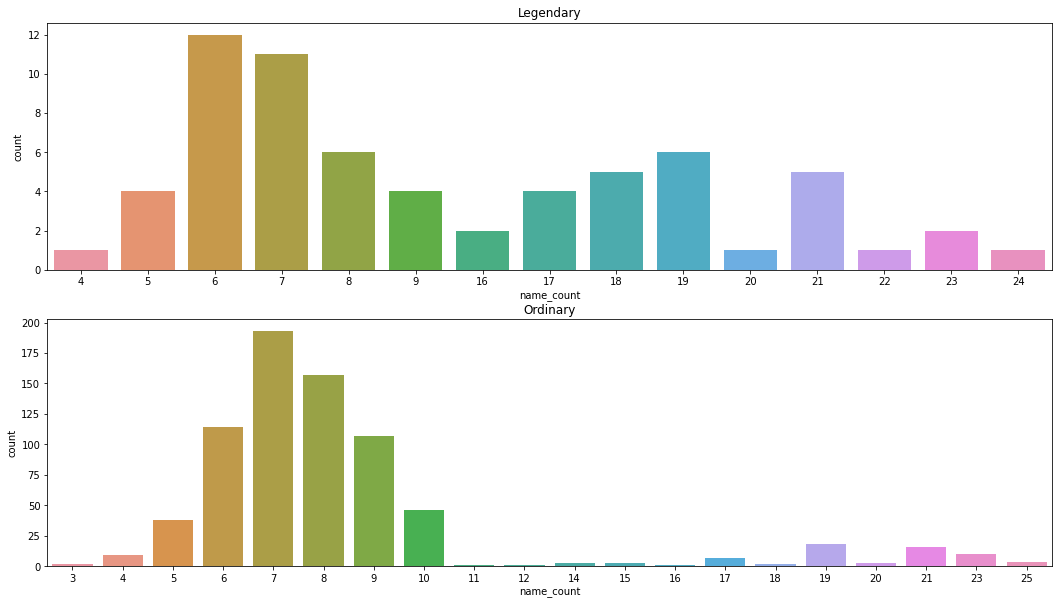

In [22]:
# 새롭게 추가한 이름 길이 컬럼 시각화
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data = legendary , x = "name_count")
plt.title("Legendary")

plt.subplot(212)
sns.countplot(data = ordinary , x = "name_count")
plt.title("Ordinary")
plt.show()

- 그래프를 통해 확인한 결과 **전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은** 반면, **일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.**

In [23]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [24]:
# 일반 포켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


- **전설의 포켓몬의 이름이 10 이상일 확률은 41%** 를 넘는 반면, **일반 포켓몬의 이름이 10 이상일 확률은 약 16%** 밖에 안됨을 확인할 수 있습니다!   
- 이는 아주 큰 차이이므로 legendary인지 아닌지를 구분하는데에 큰 의미를 가집니다.

위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.

**1. 만약 "Latios"가 전설의 P켓몬이라면, "%%% Latios" 또한 전설의 P켓몬이다!**   
**2. 적어도 전설의 P켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!**   
**3. 전설의 P켓몬은 긴 이름을 가졌을 확률이 높다!**

---

### (3) 세,네 번째 컬럼 `Type 1` & `Type 2` : 포켓몬의 속성

3번째, 4번째 컬럼인 Type 1과 Type 2 컬럼은 동일하게 포켓몬의 속성을 나타내고 있기 때문에 같이 살펴보겠습니다.    
두 마리의 포켓몬을 한 번 뽑아볼까요?

In [25]:
# 두 개의 데이터를 확인해보겠습니다.
pkemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


- 포켓몬 2마리를 살펴보았더니 Type 1과 Type 2 컬럼값을 확인할 수 있습니다.
- 포켓몬이 가지는 속성은 **기본적으로 하나, 또는 최대 두 개까지** 가질 수 있는 것 같군요.  
- 이를 보았을 때 결측값이 왜 Type 2 컬럼에만 존재했는지를 알 수 있습니다.
- 특히, 데이터 셋에는 하나의 속성만을 가지는 포켓몬은 Type 1에만 속성이 표시되고 Type 2에는 NaN값이 들어가 있습니다.

그렇다면, 속성의 종류는 총 몇 가지인지 알아봅시다.

In [26]:
# 속성의 종류를 확인해봅시다.
len(pkemon["Type 1"].unique()), len(pkemon["Type 2"].unique())

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있는데, 여기서 Type 2가 한 가지 더 많은 것은

In [27]:
# 2번 속성이 더 많은 이유는 무엇일까요?
set(pkemon["Type 2"]) - set(pkemon["Type 1"])

{nan}

`Nan`값임을 알 수 있고, 따라서 그 외의 나머지 18가지 속성은 같은 종류로 데이터가 들어가 있음을 알 수 있습니다.

In [28]:
# 모든 타입을 types 변수에 저장
types = list(pkemon["Type 1"].unique())
print(len(types))
print(types)

18
['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


그렇다면 Type를 하나만 가지고 있는 포켓몬은 몇 마리일까요?

In [29]:
# Type 2가 NaN값인 데이터의 개수
len(pkemon[pkemon["Type 2"].isna()])

386

총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

그렇다면 Type을 두개 모두 가지고 있을 때 전설 포켓몬일 확률이 높은지도 함께 계산해볼까요?

In [30]:
# 전설 포켓몬 중 두개의 Type을 모두 가지고 있는 경우
legendary['Type 2'].notnull().sum()

40

#### `Type 1` 데이터 분포 plot
일반 포켓몬과 전설 포켓몬의 속성 분포가 각각 어떤지 확인해보겠습니다.    
우리의 데이터는 일반 포켓몬에 비해 전설 포켓몬 수가 매우 적은 불균형 데이터이기 때문에, 전설 포켓몬은 따로 시각화를 해 주는 것이 좋을 것 같군요.

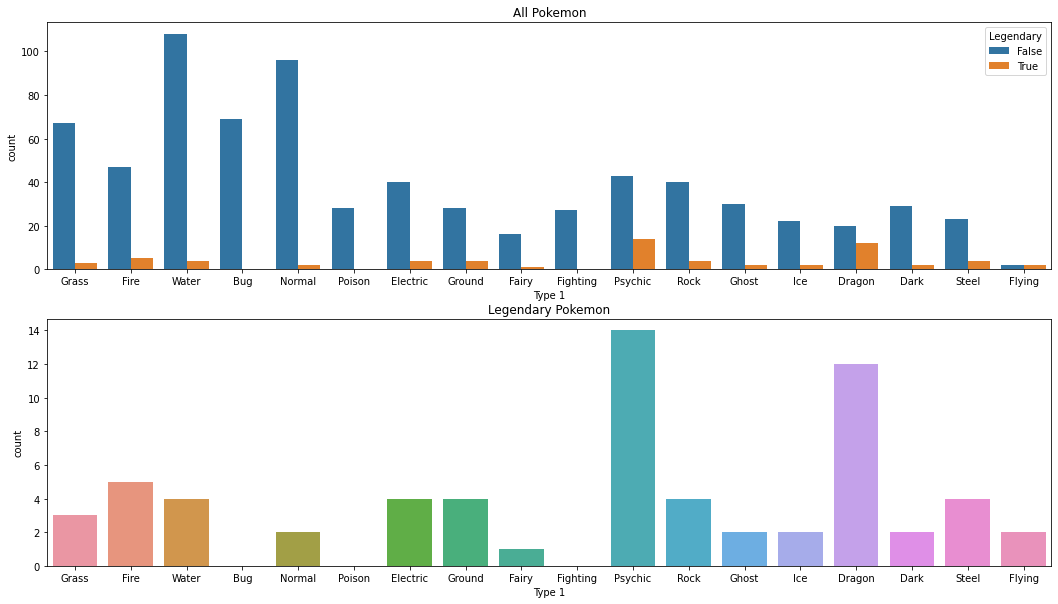

In [31]:
# Type 1 분포 시각화하기
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Type 1" , hue = "Legendary", order = types)
plt.title('All Pokemon')

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1" , order = types)
plt.title('Legendary Pokemon')

plt.show()

- 확실한 양상 차이가 보이는 것 같습니다. 일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많네요.

그렇다면, 피벗테이블로 각 속성에 전설 포켓몬들이 몇 퍼센트씩 있는지 확인해봅시다.

In [32]:
pd.pivot_table(pkemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 1,Flying,Dragon,Psychic,Steel,Ground,Fire,Electric,Rock,Ice,Dark,Ghost,Fairy,Grass,Water,Normal,Poison,Fighting,Bug
Legendary,0.5,0.375,0.245614,0.148148,0.125,0.096154,0.090909,0.090909,0.083333,0.064516,0.0625,0.058824,0.042857,0.035714,0.020408,0.0,0.0,0.0


- Legendary 비율이 가장 높은 속성은 Flying으로, 50퍼센트의 비율을 갖습니다.
- 속성이 Flying 일 경우, 즉 비행 속성을 가진 포켓몬일수록 전설 포켓몬일 가능성이 높겠네요!

#### `Type 2` 데이터 분포 plot
Type 2는 어떨까요?    
참고로, Type 2에는 NaN(결측값)이 존재했었습니다. Countplot을 그릴 때에는 결측값은 자동으로 제외됩니다.

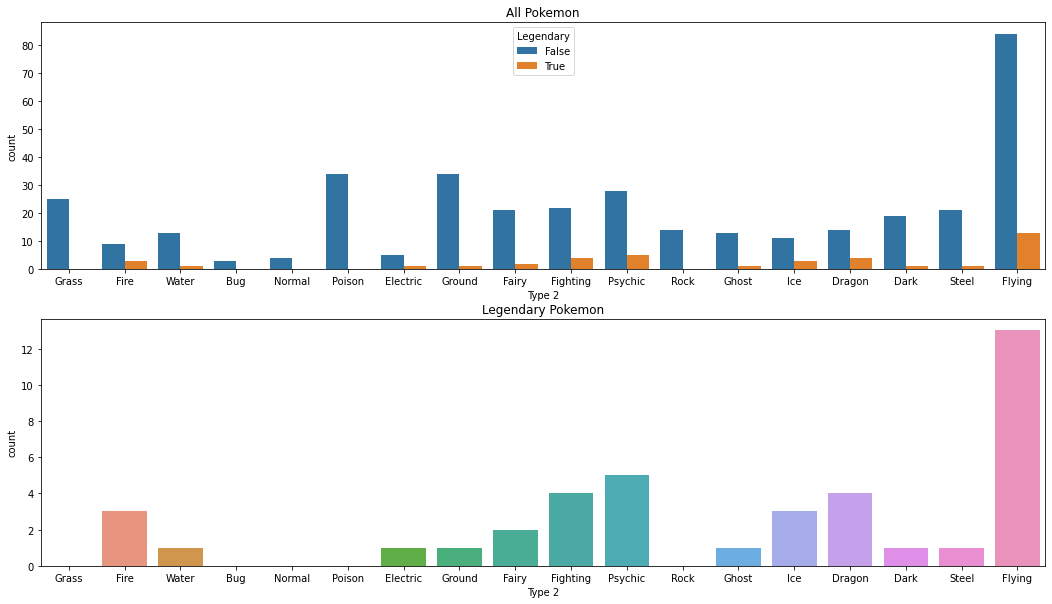

In [33]:
# Type 2 분포 시각화하기
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Type 2" , hue = "Legendary", order = types)
plt.title('All Pokemon')

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 2" , order = types)
plt.title('Legendary Pokemon')

plt.show()

- Type 2 또한 일반 P켓몬과 전설 포켓몬의 분포 차이가 보입니다.
- Flying 속성의 경우 두 경우 다 가장 많지만, 일반 P켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 P켓몬은 하나도 없습니다.
- 대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

역시 피벗 테이블로도 확인해볼까요?

In [34]:
pd.pivot_table(pkemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False).T

Type 2,Fire,Dragon,Ice,Electric,Fighting,Psychic,Flying,Fairy,Water,Ghost,Dark,Steel,Ground,Rock,Bug,Poison,Normal,Grass
Legendary,0.25,0.222222,0.214286,0.166667,0.153846,0.151515,0.134021,0.086957,0.071429,0.071429,0.05,0.045455,0.028571,0.0,0.0,0.0,0.0,0.0


### (4) `Total` : 모든 스탯의 총합

이번 실습에서 사용하는 데이터셋에 존재하는 포켓몬은 포켓몬의 체력인 **HP**, 물리공격력 **Attack**, 물리공격에 대한 방어력인 **Defense** , 특수공격력 (fire blast, bubble beam 등)인 **Sp. Atk** ,  특수공격에 대한 방어력인 **Sp. Def** , 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정(더 높은 포켓몬이 먼저 공격한다)하는 **Speed** 의 총 6가지의 스탯값을 가집니다. 

그리고 여기서 살펴볼 Total 컬럼은 이 6가지 속성값의 총 합입니다.

물론 6가지 속성값 모두 하나하나씩 살펴볼 수 있지만, 일반 포켓몬보다 강력하다 라는 특징을 가진 전설 포켓몬이기 때문에 위 6가지 컬럼의 값은 모두 숫자가 클수록(높을 수록) 강력하다는 동일한 의미를 가지고 있습니다. 따라서 이 6가지 컬럼을 다 합한 컬럼인 Total을 통해서 전설 포켓몬의 특징을 먼저 살펴보도록 하겠습니다.

In [35]:
# 6가지 전체 스탯을 stats 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

#### `Total`값에 따른 분포 plot
그렇다면 Total값과 전설 포켓몬과는 어떤 관계가 있는지, 해당 컬럼에 따른 전설 포켓몬의 특징을 확인해봅시다.

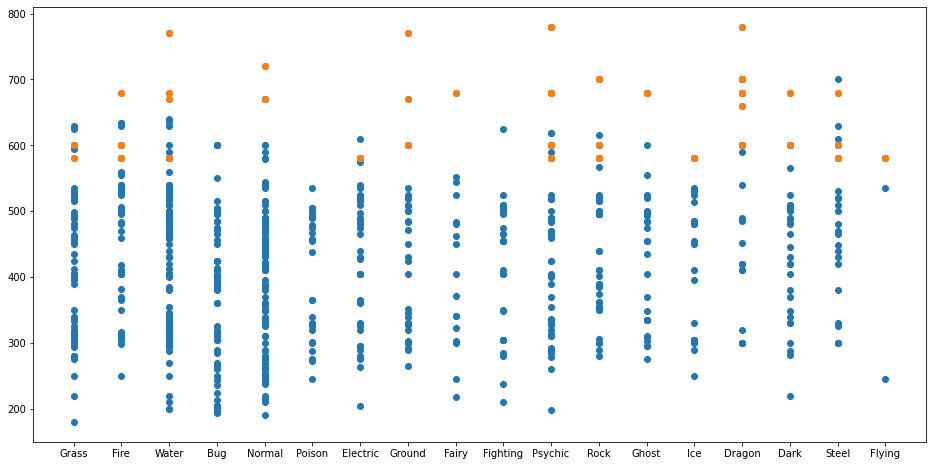

In [36]:
# 분포를 산점도로 표현하여 시각화해보기
plt.figure(figsize=(16,8))

plt.scatter(data = pkemon, x = "Type 1", y = "Total")
plt.scatter(data = legendary, x = "Type 1", y = "Total")
plt.show()

Type 1별로 Total 값을 확인했을 때, 전설 포켓몬은 주로 Total stat 값이 높다는 것이 확인됩니다.
예상대로 전설 포켓몬은 일반 포켓몬보다 훨씬 **강력**하다는 것을 알 수 있군요!

먼저 전설 포켓몬들의 속성 Total값을 확인해봅시다.

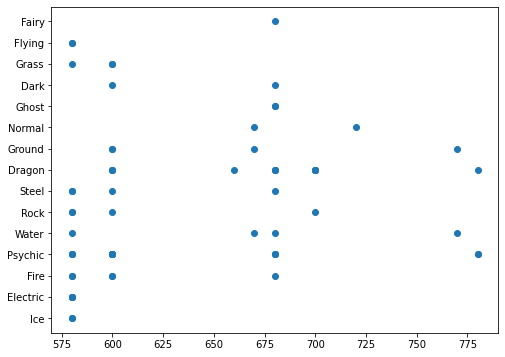

In [37]:
# 전설 포켓몬 속성 Total 값 확인하기
plt.figure(figsize=(8,6))

plt.scatter(data = legendary, y = "Type 1", x = "Total")
plt.show()

데이터 시각화를 통해 특징이 보이는 것 같습니다.

바로, 전설의 P켓몬들의 Total값들이 580, 600 등과 같은 **특정 수치 값에 몰려있다는 점**입니다. 무언가 이상하지 않나요?

실제로 전설의 P켓몬이 가지는 Total값들의 고유값을 확인해봅시다.

In [38]:
# 전설 포켓몬이 가지는 Total 고유값 확인하기
print(legendary["Total"].unique())
len(legendary["Total"].unique())

[580 680 780 600 700 670 770 720 660]


9

실제로 단 9가지 값밖에 존재하지 않는군요! 그래프로도 확인해 봅시다.

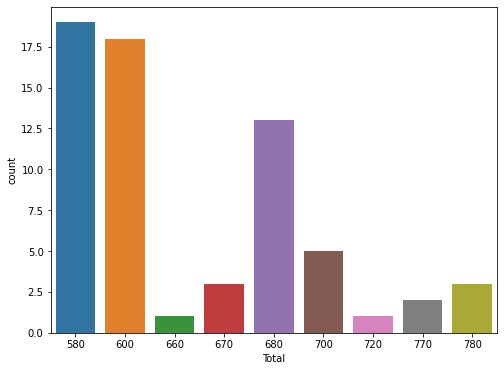

In [39]:
# 전설 포켓몬이 가지는 Total값에 대한 수 확인
plt.figure(figsize=(8,6))

sns.countplot(data = legendary, x = "Total")
plt.show()

총 65마리의 전설 포켓몬이 9개의 Total값만 가진다는 것은,

In [40]:
# Total 스탯값이 같은 전설 포켓몬 개수 확인
65/9

7.222222222222222

**약 7.22마리끼리는 같은 Total 스탯값을 가진다**는 의미와 같습니다. 이는 언뜻 봐도 꽤.. 높은 값인 것 같은 느낌을 주네요.

그렇다면 일반 포켓몬은 어떨까요? 같은 방법으로 다시 확인해봅시다.

In [41]:
# 일반 포켓몬이 가지는 Total 고유값 확인하기
print(ordinary["Total"].unique())
len(ordinary["Total"].unique())

[318 405 525 625 309 534 634 314 530 630 195 205 395 495 251 349 479 579
 253 413 262 442 288 438 320 485 300 450 275 365 505 273 323 483 299 270
 435 245 455 490 285 305 265 290 440 500 350 555 385 510 310 400 590 390
 335 515 410 315 325 465 352 460 475 600 328 330 480 520 425 340 345 295
 200 540 640 535 355 615 420 215 415 250 218 210 470 280 610 360 180 430
 336 380 700 635 220 240 198 278 518 618 269 414 670 266 456 236 237 474
 190 375 260 575 302 467 560 458 468 308 565 580 194 384 263 363 523 224
 424 244 482 348 498 452 329 411 454 334 494 594 545 528 418 255 370 281
 446 316 292 487 264 358 488 497 313 508 445 294 509 351 519 461 303 401
 567 473 428 464 319 472 489 471 484 550 307 409 423 382 499 213 369 507
 371 552 531 466 448 341 462 306 289 481 362 521 431 304 514]


195

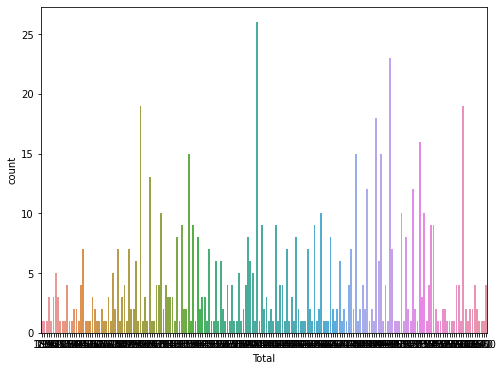

In [42]:
plt.figure(figsize=(8,6))

sns.countplot(data = ordinary, x = "Total")
plt.show()

- 195마리를 x축에 다 표현하기 어렵기 때문에 시각화를 통해서는 한 눈에 확인이 어려울 것 같습니다

일반 포켓몬은 총 195개의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로,

In [43]:
# Total 스탯값이 같은 일반 포켓몬 개수 확인
735/195

3.769230769230769

**약 3.77마리만 같은 Total 스탯값을 가지는군요.**   

이로써 다음 두 가지를 알 수 있습니다.

1. Total값의 다양성은 일반 포켓몬이 전설 포켓몬보다 두 배 가까운 값을 가진다, 즉 전설 포켓몬의 Total값은 다양하지 않다.
: total 속성값이 전설 포켓몬의 값들의 집합에 포함되는지의 여부는 전설 포켓몬임을 결정하는 데에 영향을 미친다.
2. 또한, 전설 포켓몬의 Total값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다. ex) 680, 720, 770, 780

: Total값은 전설 포켓몬인지 아닌지의 여부를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있다. 　
즉, Total값은 전설 포켓몬 여부를 판단하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

### (5) Stats: `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

그렇다면 총합인 Total 뿐만 아니라 각각의 stat에 대해서는 어떻게 분포되어 있을까요?    
subplot으로 여러 그래프를 한 번에 확인해봅시다.

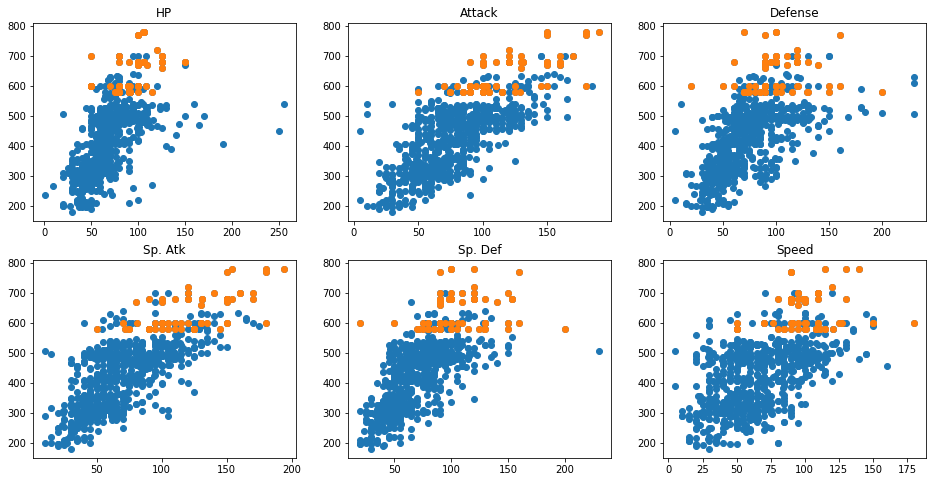

In [44]:
# 6가지 스탯 값 시각화하기 
plt.figure(figsize=(16,8))

plt.subplot(231)
plt.scatter(data=pkemon, y="Total", x="HP")
plt.scatter(data=legendary, y="Total", x="HP")
plt.title('HP')

plt.subplot(232)
plt.scatter(data=pkemon, y="Total", x="Attack")
plt.scatter(data=legendary, y="Total", x="Attack")
plt.title('Attack')

plt.subplot(233)
plt.scatter(data=pkemon, y="Total", x="Defense")
plt.scatter(data=legendary, y="Total", x="Defense")
plt.title('Defense')

plt.subplot(234)
plt.scatter(data=pkemon, y="Total", x="Sp. Atk")
plt.scatter(data=legendary, y="Total", x="Sp. Atk")
plt.title('Sp. Atk')

plt.subplot(235)
plt.scatter(data=pkemon, y="Total", x="Sp. Def")
plt.scatter(data=legendary, y="Total", x="Sp. Def")
plt.title('Sp. Def')

plt.subplot(236)
plt.scatter(data=pkemon, y="Total", x="Speed")
plt.scatter(data=legendary, y="Total", x="Speed")
plt.title('Speed')

plt.show()

- **`HP`, `Defense`, `Sp. Def`**
    - 전설 포켓몬은 주로 높은 스탯들을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설 포켓몬보다 특히 높은 몇몇 포켓몬이 있었다.
그러나 그 포켓몬들도 Total값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다.
(ex. 방어형, 공격형 등)
- **`Attack`, `Sp. Atk`, `Speed`**
    - 이 세 가지 스탯은 Total과 거의 비례하는 양상을 띈다. 전설 포켓몬이 각 스탯의 최대치들을 차지하고 있다.
    

### (6) `Generation` : 포켓몬의 세대

Generation은 각 포켓몬의 "세대"를 나타냅니다.
포켓몬의 세대란, 발매된 게임의 시리즈(버젼)에 따라 분리되게 되는데요, 숫자가 작을 수록, 즉 세대가 낮을 수록 게임 발매가 오래되었음을 의미합니다.

각 세대에 대한 포켓몬의 수를 확인해 봅시다.

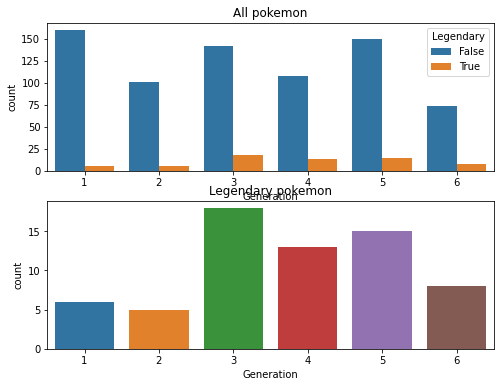

In [45]:
# 세대별 데이터 시각화 
plt.figure(figsize=(8,6))

plt.subplot(211)
sns.countplot(data = pkemon, x = "Generation", hue = "Legendary")
plt.title('All pokemon')
plt.subplot(212)
sns.countplot(data = legendary, x = "Generation")
plt.title('Legendary pokemon')

plt.show()

전설 포켓몬은 1, 2세대에는 많지 않았나보네요. 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있습니다.